<a href="https://colab.research.google.com/github/peremartra/LLMOptCost/blob/main/00/02_pruning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torch.nn.utils.prune as prune
from transformers import AutoModelForCausalLM, AutoTokenizer
import matplotlib.pyplot as plt

In [ ]:
def check_sparsity(layer):
    zero_weights = torch.sum(layer.weight == 0).item()
    total_weights = layer.weight.numel()
    sparsity = zero_weights / total_weights
    print(f"Sparsity: {sparsity:.2%} of the weights are zero.")

In [ ]:
# Visualize weights before and after pruning
def visualize_weights(layer_weights, title):
    plt.figure(figsize=(5, 3))
    plt.hist(layer_weights.cpu().detach().numpy().flatten(), bins=100)
    plt.title(title)
    plt.xlabel("Weight Values")
    plt.ylabel("Frequency")
    plt.xlim([-0.1, 0.1])  # Set x-axis range between -0.2 and 0.2
    plt.show()

In [ ]:
# Load  Hugging Face model
base_model_name = "bigscience/bloomz-560m"
pruned_model_name = "bloomz-560m-pruned"
model = AutoModelForCausalLM.from_pretrained(base_model_name)


config.json:   0%|          | 0.00/715 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.12G [00:00<?, ?B/s]

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(base_model_name)

tokenizer_config.json:   0%|          | 0.00/222 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

In [ ]:
# Choose a linear layer to inspect
layer_name = "transformer.h.0.mlp.dense_h_to_4h"
layer = dict(model.named_modules())[layer_name]

## Pruning and comparing the model

In [ ]:
check_sparsity(layer)

Sparsity: 0.00% of the weights are zero.


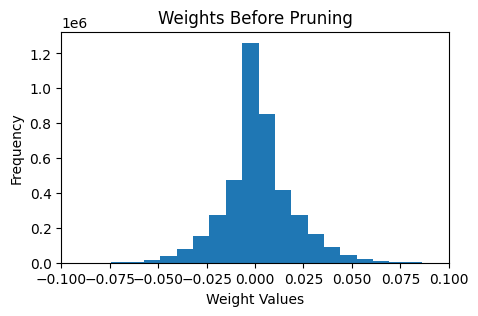

In [ ]:
visualize_weights(layer.weight, "Weights Before Pruning")

In [ ]:
#Pruning process
for name, module in model.named_modules():
      if isinstance(module, torch.nn.Linear):
        # Perform magnitude pruning on each linear layer,
        prune.l1_unstructured(module, name='weight', amount=0.3)
        prune.remove(module, 'weight')

In [ ]:
layer = dict(model.named_modules())[layer_name]
check_sparsity(layer)

Sparsity: 30.00% of the weights are zero.


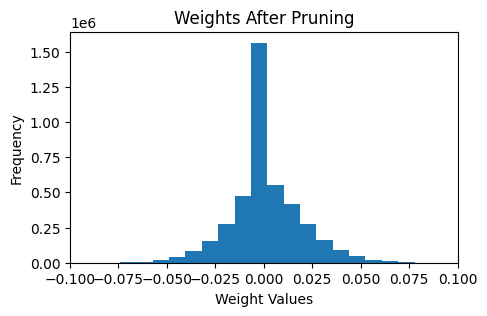

In [ ]:
visualize_weights(layer.weight, "Weights After Pruning")

# Uploading the model to Hugging Face

In [ ]:
# Save the quantized model
model.save_pretrained(
    pruned_model_name,
)
tokenizer.save_pretrained(pruned_model_name)

('bloomz-560m-pruned/tokenizer_config.json',
 'bloomz-560m-pruned/special_tokens_map.json',
 'bloomz-560m-pruned/tokenizer.json')

In [ ]:
model.push_to_hub(pruned_model_name,
                  private=False,
                  use_temp_dir=False)

model.safetensors:   0%|          | 0.00/2.24G [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/oopere/bloomz-560m-pruned/commit/a202a086d10672e0ef8e3b9c9625774937d97490', commit_message='Upload BloomForCausalLM', commit_description='', oid='a202a086d10672e0ef8e3b9c9625774937d97490', pr_url=None, pr_revision=None, pr_num=None)

In [ ]:
tokenizer.push_to_hub(pruned_model_name,
                      private=False,
                      use_temp_dir=False)

README.md:   0%|          | 0.00/5.17k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/14.5M [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/oopere/bloomz-560m-pruned/commit/ff5eb955eaf0529a8c16d5462ad4f83363483734', commit_message='Upload tokenizer', commit_description='', oid='ff5eb955eaf0529a8c16d5462ad4f83363483734', pr_url=None, pr_revision=None, pr_num=None)